In [1]:
import pandas
import mba263
import matplotlib
import numpy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
pandas.reset_option('display.max_rows')

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data=pandas.read_csv('cell2cell.csv')

In [3]:
len(data)

71047

In [4]:
data.tail(10)

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
71037,1099962,1,1,1.0,30.237499,63.25,29.990000,0.2475,0.0,0.00,...,0,0,0,0,0,5,0,1,0.00000,0
71038,1099963,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,7,0,1,0.00000,0
71039,1099965,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,7,0,0,59.98999,0
71040,1099969,1,1,1.0,33.630001,28.00,29.990000,0.0000,0.0,0.00,...,0,0,1,0,1,0,0,0,29.98999,0
71041,1099985,1,1,1.0,85.150002,815.00,87.989998,0.0000,1.0,0.39,...,0,0,0,0,1,0,0,0,39.98999,0
71042,1099987,1,1,1.0,117.490000,384.00,29.990000,0.0000,250.0,0.00,...,0,0,0,0,0,2,0,0,29.98999,0
71043,1099988,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,1,0.00000,0
71044,1099990,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,0,59.98999,0
71045,1099992,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,8,0,1,0.00000,0
71046,1099995,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,7,0,0,79.98999,0


In [5]:
data.describe()

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
count,7.104700e+04,71047.000000,71047.000000,40000.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,...,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000
mean,1.050487e+06,0.563008,0.290076,0.500000,58.852803,525.728392,46.876305,0.894027,40.095361,1.221071,...,0.017918,0.192943,0.138781,0.050854,0.249835,4.334229,0.013456,0.566512,35.798580,0.034034
std,2.919911e+04,0.496018,0.453800,0.500006,44.243583,530.134259,23.915095,2.197709,96.347103,9.081089,...,0.141485,0.394611,0.345721,0.290444,0.432920,3.137063,0.115217,0.495560,57.040961,0.181317
min,1.000001e+06,0.000000,0.000000,0.000000,-6.167500,0.000000,-11.290000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025144e+06,0.000000,0.000000,0.000000,33.642502,158.250000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050370e+06,1.000000,0.000000,0.500000,48.529999,366.000000,44.990002,0.247500,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,1.076230e+06,1.000000,1.000000,1.000000,71.029999,721.750000,59.990002,0.990000,40.750000,0.257500,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,39.989990,0.000000
max,1.099999e+06,1.000000,1.000000,1.000000,1223.380000,7667.750000,399.989990,159.390000,4320.750000,1112.447500,...,4.000000,1.000000,1.000000,35.000000,1.000000,9.000000,1.000000,1.000000,499.989990,1.000000


Split training and validation sets

In [6]:
data_cal=data[data['calibrat']==1]

In [7]:
len(data_cal)

40000

In [8]:
data_val=data[data['calibrat']==0]
len(data_val)

31047

In [9]:
data_cal['churn'].mean()

0.5

In [10]:
data_val['churn'].mean()

0.019615421779882115

In [11]:
data_cal.columns

Index(['customer', 'calibrat', 'churn', 'churndep', 'revenue', 'mou',
       'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer',
       'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec',
       'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv',
       'callwait', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models',
       'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa',
       'prizmrur', 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres',
       'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
       'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
       'setprcm', 'setprc', 'retcall'],
      dtype='object')

In [12]:
varlist=['revenue', 'mou',
       'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer',
       'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec',
       'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv',
       'callwait', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models',
       'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa',
       'prizmrur', 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres',
       'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
       'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
       'setprcm', 'setprc', 'retcall']

In [13]:
res = mba263.logit(data_cal['churndep'],data_cal[varlist])
res.summary()

Optimization terminated successfully.
         Current function value: 0.671533
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                38941
Model:                    Mba263Logit   Df Residuals:                    38874
Method:                           MLE   Df Model:                           66
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.03117
Time:                        17:55:38   Log-Likelihood:                -26150.
converged:                       True   LL-Null:                       -26992.
Covariance Type:            nonrobust   LLR p-value:                6.012e-308
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1497      0.095      1.571      0.116      -0.037       0.336
revenue        0.0020      0.001      2.460      0.014       0.000       0.004
mou           -0.0003   4.96e-05     -5.657      0.000      -0.000      -0.000
recchrge      -0.0031      0.001     -3.513      0.000      -0.005      -0.001
directas      -0.0012      0.006     -0.201      0.840      -0.013       0.010
overage        0.0008      0.000      2.711      0.007       0.000       0.001
roam           0.0071      0.002      3.436      0.001       0.003       0.011
changem       -0.0005   5.35e-05     -9.194      0.000      -0.001      -0.000
changer        0.0023      0.000      6.247      0.000       0.002       0.003
dropvce        0.0113      0.007      1.563      0.118      -0.003       0.026
blckvce        0.0064      0.007      0.895      0.371      -0.008       0.020
unansvce       0.0009      0.000      2.058      0.040    4.38e-05       0.002
custcare      -0.0060      0.003     -2.331      0.020      -0.011      -0.001
threeway      -0.0303      0.011     -2.691      0.007      -0.052      -0.008
mourec         0.0001      0.000      1.018      0.309      -0.000       0.000
outcalls       0.0011      0.001      1.894      0.058   -3.87e-05       0.002
incalls       -0.0031      0.001     -2.937      0.003      -0.005      -0.001
peakvce       -0.0007      0.000     -3.058      0.002      -0.001      -0.000
opeakvce      -0.0002      0.000     -0.783      0.434      -0.001       0.000
dropblk       -0.0031      0.007     -0.442      0.658      -0.017       0.011
callfwdv      -0.0026      0.023     -0.114      0.909      -0.048       0.043
callwait       0.0021      0.003      0.664      0.507      -0.004       0.008
months        -0.0213      0.002    -10.652      0.000      -0.025      -0.017
uniqsubs       0.1844      0.020      9.225      0.000       0.145       0.224
actvsubs      -0.2057      0.028     -7.372      0.000      -0.260      -0.151
phones         0.0487      0.018      2.678      0.007       0.013       0.084
models         0.0138      0.028      0.495      0.621      -0.041       0.068
eqpdays        0.0014   7.47e-05     19.309      0.000       0.001       0.002
age1          -0.0033      0.001     -3.787      0.000      -0.005      -0.002
age2          -0.0012      0.001     -1.718      0.086      -0.003       0.000
children       0.0946      0.028      3.359      0.001       0.039       0.150
credita       -0.1781      0.036     -5.016      0.000      -0.248      -0.108
creditaa      -0.3626      0.035    -10.488      0.000      -0.430      -0.295
prizmrur       0.0665      0.050      1.342      0.180      -0.031       0.164
prizmub       -0.0396      0.024     -1.624      0.104      -0.087       0.008
prizmtwn       0.0462      0.031      1.470      0.142      -0.015       0.108
refurb         0.2340      0.032      7.323      0.000       0.171       0.297
webcap        -0.1561      0.038     -4.157      0.000      -0.230      -0.083
tr

In [14]:
data_cal['predchurn']=res.predict(data_cal[varlist])
data_cal['predchurn'].head(10)

31047    0.792126
31048    0.321484
31049    0.268582
31050    0.511219
31051    0.413891
31052    0.307309
31053    0.307915
31054    0.344118
31055    0.195337
31056    0.429019
Name: predchurn, dtype: float64

<AxesSubplot:xlabel='grading'>

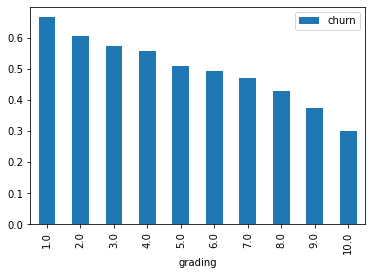

In [15]:
data_cal['grading']=10-mba263.ntile(data_cal['predchurn'],10)
data_cal[['churn','grading']].groupby('grading').mean().plot(kind='bar')

Do prediction on validation set

In [16]:
data_val['predchurn']=res.predict(data_val[varlist])
data_val['predchurn'].head(10)

0    0.243826
1    0.248394
2    0.315737
3    0.282984
4    0.359726
5    0.456797
6    0.455037
7    0.303622
8    0.249502
9    0.280634
Name: predchurn, dtype: float64

In [17]:
data_val['predchurn'].mean()

0.47722733807628936

In [18]:
data_val['churn'].mean()

0.019615421779882115

Churn in validation sample is way overpredicted

<AxesSubplot:xlabel='grading'>

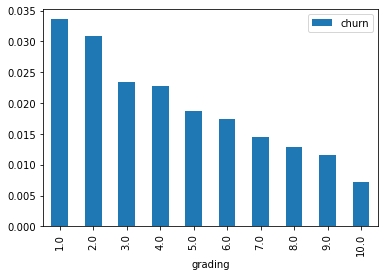

In [19]:
data_val['grading']=10-mba263.ntile(data_val['predchurn'],10)
data_val[['churn','grading']].groupby('grading').mean().plot(kind='bar')

In [20]:
data_val[['churn','grading']].groupby('grading').describe()

churn                                             
          count      mean       std  min  25%  50%  75%  max
grading                                                     
1.0      3037.0  0.033586  0.180190  0.0  0.0  0.0  0.0  1.0
2.0      3037.0  0.030952  0.173215  0.0  0.0  0.0  0.0  1.0
3.0      3037.0  0.023378  0.151127  0.0  0.0  0.0  0.0  1.0
4.0      3036.0  0.022727  0.149057  0.0  0.0  0.0  0.0  1.0
5.0      3037.0  0.018769  0.135729  0.0  0.0  0.0  0.0  1.0
6.0      3037.0  0.017451  0.130968  0.0  0.0  0.0  0.0  1.0
7.0      3036.0  0.014493  0.119530  0.0  0.0  0.0  0.0  1.0
8.0      3037.0  0.012842  0.112609  0.0  0.0  0.0  0.0  1.0
9.0      3037.0  0.011525  0.106750  0.0  0.0  0.0  0.0  1.0
10.0     3037.0  0.007244  0.084817  0.0  0.0  0.0  0.0  1.0

Top decile has about 3.4% churn rate

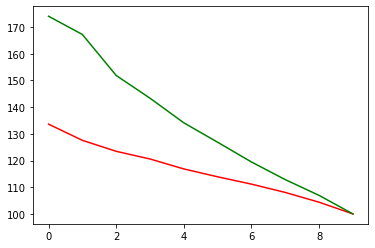

In [21]:
lift_cal= mba263.lift(data_cal['churn'],data_cal['predchurn'],10)
lift_val= mba263.lift(data_val['churn'],data_val['predchurn'],10)
plt.plot(lift_cal,'r')
plt.plot(lift_val,'g')

In [22]:
lift_val

array([174.04997073, 167.22448168, 151.86713132, 143.34707006,
       134.12969283, 126.84729936, 119.45729662, 112.84315486,
       106.94048676, 100.        ])

Lift in top decile is just over 170, so we are already good, but can probably improve a bit

<h2>Figuring out which predictors are most important</h2>

In [23]:
mba263.odds_ratios(res)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
revenue,1.001965,0.000800,2.457744,0.014,1.000414,1.003517
mou,0.999719,0.000050,5.657881,0.000,0.999623,0.999815
recchrge,0.996882,0.000886,3.518808,0.000,0.995164,0.998601
directas,0.998805,0.005932,0.201471,0.840,0.987298,1.010312
overage,1.000761,0.000281,2.710145,0.007,1.000216,1.001305
...,...,...,...,...,...,...
income,0.986843,0.005955,2.209407,0.027,0.975289,0.998396
mcycle,1.130099,0.100562,1.293722,0.196,0.935009,1.325189
setprcm,0.908173,0.036793,2.495750,0.013,0.836794,0.979552
setprc,1.000621,0.000283,2.193501,0.028,1.000072,1.001169


In [24]:
x_std=data_val[varlist].std()
x_std

revenue      44.372524
mou         536.601264
recchrge     24.149383
directas      2.348869
overage      93.803961
               ...    
income        3.127723
mcycle        0.112496
setprcm       0.497041
setprc       57.561782
retcall       0.158540
Length: 66, dtype: float64

In [25]:
odds_ratios=mba263.odds_ratios(res)['Odds ratios']
odds_ratios

revenue     1.001965
mou         0.999719
recchrge    0.996882
directas    0.998805
overage     1.000761
              ...   
income      0.986843
mcycle      1.130099
setprcm     0.908173
setprc      1.000621
retcall     2.211559
Name: Odds ratios, Length: 66, dtype: float64

In [26]:
normalized_odds_ratios=numpy.power(odds_ratios,x_std)
normalized_odds_ratios

revenue     1.091034
mou         0.860095
recchrge    0.927366
directas    0.997195
overage     1.073919
              ...   
income      0.959420
mcycle      1.013854
setprcm     0.953253
setprc      1.036354
retcall     1.134092
Length: 66, dtype: float64

In [55]:
pandas.set_option('display.max_rows', 90)
normalized_odds_ratios[normalized_odds_ratios<1]=1/normalized_odds_ratios[normalized_odds_ratios<1]
normalized_odds_ratios.sort_values(ascending=False)

eqpdays     1.434377
months      1.236999
uniqsubs    1.167221
mou         1.162662
actvsubs    1.137579
creditaa    1.134855
retcall     1.134092
changem     1.130615
dropvce     1.109496
revenue     1.091034
changer     1.090115
refurb      1.082726
recchrge    1.078323
age1        1.075765
peakvce     1.074544
overage     1.073919
roam        1.073221
blckvce     1.072231
phones      1.068229
mailres     1.065100
credita     1.056820
marryun     1.054241
incalls     1.052255
dropblk     1.049800
setprcm     1.049040
webcap      1.044985
income      1.042296
children    1.041202
outcalls    1.040660
incmiss     1.040211
threeway    1.039033
unansvce    1.037280
setprc      1.036354
custcare    1.031060
age2        1.028502
newcelly    1.028213
marryyes    1.027185
mourec      1.022726
opeakvce    1.019971
creditcd    1.019840
prizmub     1.018723
refer       1.016958
retaccpt    1.016576
prizmtwn    1.016516
occhmkr     1.014822
prizmrur    1.013894
mcycle      1.013854
pcown       1

Would use these results as basis for churn plan!

<h2>Trying to improve model</h2>

In [28]:
data_cal_nonmissing=data_cal.dropna()
data_cal_nonmissing
X = data_cal_nonmissing[varlist]

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,27.799964,revenue
1,11.959589,mou
2,18.245604,recchrge
3,1.582137,directas
4,7.097227,overage
...,...,...
61,9.196592,income
62,1.047113,mcycle
63,7.218457,setprcm
64,3.046944,setprc


There's lots of variables that have a high co-linearity with one another (high VIF) - this could be used to eliminate variables if we want

In [30]:
# Test different alpha levels
alphas = numpy.arange(0, 51, 5)
n_alphas = len(alphas)
topdec = numpy.zeros([n_alphas])
index=0

for alpha in alphas:
    result=mba263.logit_reg(data_cal['churndep'],data_cal[varlist],alpha=alpha)
    data_val['predict']=result.predict(data_val[varlist])
    data_val['gradingit']=10-mba263.ntile(data_val['predict'],10)
    decs=data_val[['churn','gradingit']].groupby('gradingit').mean()
    topdec[index]=decs.loc[1,'churn']
    index+=1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6715330588481454
            Iterations: 201
            Function evaluations: 256
            Gradient evaluations: 201
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.672034312391814
            Iterations: 242
            Function evaluations: 298
            Gradient evaluations: 242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6724454477315635
            Iterations: 174
            Function evaluations: 229
            Gradient evaluations: 174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6728115378239092
            Iterations: 170
            Function evaluations: 225
            Gradient evaluations: 170
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6731532815013931
            Iterations: 149
            

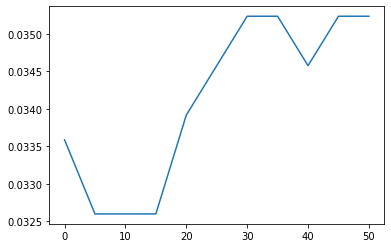

In [31]:
plt.plot(alphas,topdec)

Alpha of 30 works well to maximize predicted churn of top decile

In [32]:
res2=mba263.logit_reg(data_cal['churndep'],data_cal[varlist],alpha=30)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6737856740633501
            Iterations: 127
            Function evaluations: 183
            Gradient evaluations: 127


In [33]:
data_val['predchurn2']=res2.predict(data_val[varlist])
data_val['predchurn2'].head(10)

0    0.268225
1    0.275962
2    0.353664
3    0.313440
4    0.367491
5    0.465665
6    0.449327
7    0.336729
8    0.258999
9    0.289266
Name: predchurn2, dtype: float64

In [34]:
data_val['predchurn2'].mean()

0.4781773281494716

<AxesSubplot:xlabel='grading2'>

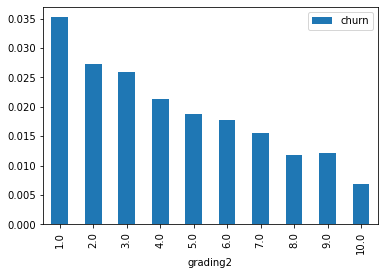

In [35]:
data_val['grading2']=10-mba263.ntile(data_val['predchurn2'],10)
data_val[['churn','grading2']].groupby('grading2').mean().plot(kind='bar')

In [36]:
data_val[['churn','grading2']].groupby('grading2').describe()

churn                                             
           count      mean       std  min  25%  50%  75%  max
grading2                                                     
1.0       3037.0  0.035232  0.184396  0.0  0.0  0.0  0.0  1.0
2.0       3037.0  0.027330  0.163069  0.0  0.0  0.0  0.0  1.0
3.0       3037.0  0.026013  0.159199  0.0  0.0  0.0  0.0  1.0
4.0       3036.0  0.021410  0.144770  0.0  0.0  0.0  0.0  1.0
5.0       3037.0  0.018769  0.135729  0.0  0.0  0.0  0.0  1.0
6.0       3037.0  0.017781  0.132175  0.0  0.0  0.0  0.0  1.0
7.0       3036.0  0.015481  0.123476  0.0  0.0  0.0  0.0  1.0
8.0       3037.0  0.011854  0.108246  0.0  0.0  0.0  0.0  1.0
9.0       3037.0  0.012183  0.109721  0.0  0.0  0.0  0.0  1.0
10.0      3037.0  0.006915  0.082880  0.0  0.0  0.0  0.0  1.0

New model gives top decile a little over 3.5% churn rate, better!

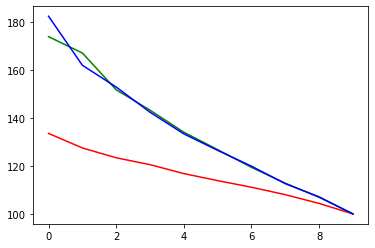

In [37]:
lift_val2= mba263.lift(data_val['churn'],data_val['predchurn2'],10)
plt.plot(lift_cal,'r')
plt.plot(lift_val,'g')
plt.plot(lift_val2,'b')

New logit model has better lift than the other logit model for top decile, over 180! Can use new logit model going forward.
Churn tactics would be targeted to top decile (grading2 value number 1) for this model!

Trying Neural Network

In [38]:
#res_nn = mba263.neural_network(data_cal['churndep'],data_cal[varlist])
#data_val['p_nn'] = res_nn.predict(data_val[varlist])
#doesn't work yet...

In [57]:
# View odds ratios for new model
odds_ratios2 = mba263.odds_ratios(res2)['Odds ratios']
odds_ratios2

revenue     1.001944
mou         0.999718
recchrge    0.996892
directas    0.999015
overage     1.000769
roam        1.007097
changem     0.999507
changer     1.002298
dropvce     1.008115
blckvce     1.003465
unansvce    1.000965
custcare    0.993969
threeway    0.973508
mourec      1.000127
outcalls    1.001025
incalls     0.996928
peakvce     0.999345
opeakvce    0.999790
dropblk     1.000000
callfwdv    1.000000
callwait    1.001625
months      0.980847
uniqsubs    1.180005
actvsubs    0.846197
phones      1.052889
models      1.006905
eqpdays     1.001409
age1        0.997109
age2        0.999131
children    1.085152
credita     0.883034
creditaa    0.730476
prizmrur    1.006749
prizmub     0.964788
prizmtwn    1.021268
refurb      1.242667
webcap      0.897718
truck       1.025674
rv          1.000000
occprof     1.000000
occcler     1.000000
occcrft     1.000000
occstud     1.000000
occhmkr     1.000000
occret      1.000000
occself     1.000000
ownrent     1.000000
marryun     1

In [51]:
# Normalize new odds ratios
normalized_odds_ratios2=numpy.power(odds_ratios2,x_std)
normalized_odds_ratios2

revenue     1.090020
mou         0.859661
recchrge    0.927593
directas    0.997688
overage     1.074815
              ...   
income      0.981650
mcycle      1.000000
setprcm     0.977753
setprc      1.051869
retcall     1.106537
Length: 66, dtype: float64

In [53]:
# Normalize new odds ratios and sort descending
pandas.set_option('display.max_rows', 90)
normalized_odds_ratios2[normalized_odds_ratios2<1]=1/normalized_odds_ratios2[normalized_odds_ratios2<1]
normalized_odds_ratios2.sort_values(ascending=False)

eqpdays     1.422264
months      1.213187
mou         1.163249
uniqsubs    1.148901
changem     1.130822
creditaa    1.115781
actvsubs    1.110315
retcall     1.106537
revenue     1.090020
changer     1.089781
recchrge    1.078059
dropvce     1.076883
refurb      1.076573
overage     1.074815
roam        1.073017
peakvce     1.072844
phones      1.072403
age1        1.066100
setprc      1.051869
incalls     1.051747
mailres     1.048799
credita     1.039359
unansvce    1.039052
blckvce     1.038403
outcalls    1.037185
children    1.035513
threeway    1.034528
custcare    1.031582
webcap      1.030877
marryun     1.023133
setprcm     1.022753
mourec      1.021516
age2        1.021144
newcelly    1.020380
opeakvce    1.020182
income      1.018693
prizmub     1.016919
creditcd    1.010158
truck       1.009933
callwait    1.009431
prizmtwn    1.007486
models      1.006395
marryyes    1.003228
directas    1.002318
prizmrur    1.001397
retcalls    1.001145
pcown       1.000717
dropblk     1